In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
    
import os
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tkr
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap, CenteredNorm, BoundaryNorm
from sys import platform
from viztool import FormatScalarFormatter, pcolor_center, pcolor_lim

def fxn():
    warnings.warn('deprecated', DeprecationWarning)

In [2]:
if platform == 'linux' or platform == 'linux2':
    data_dir = '/glade/derecho/scratch/zhihuaz/TracerInversion/Output/'
elif platform == 'darwin':
    data_dir = '/Users/zhihua/Documents/Work/Research/Projects/TRACE-SEAS/TracerInversion/Data/'
else:
    print('OS not supported.')

In [6]:
cname = 'd11_M003_Ri040_Q001_W000_D000_St0'
# ds = xr.open_dataset(data_dir+cname+'_transport_tensor_coarse.nc')
ds = xr.open_dataset(data_dir+cname+'_submeso_transport_tensor.nc')
ds.close()

α_used     = ds.α[ds.tracer_used]
α_reserved = ds.α[~ds.tracer_used]
ds['timeTf'] = ds.time/np.timedelta64(int(np.around(2*np.pi/1e-4)), 's')
ds['day'] = ds.time/np.timedelta64(1, 'D')
ds['xC'] = ds.xC/1e3
# ds['yC'] = ds.yC/1e3
ds

<xarray.Dataset> Size: 393MB
Dimensions:        (time: 4, zC: 52, xC: 2000, α: 7, β: 1, i: 2, j: 2, k: 2,
                    kv: 2, xF: 2000, zF: 53, em: 5)
Coordinates:
  * xF             (xF) float32 8kB -4e+03 -3.996e+03 ... 3.992e+03 3.996e+03
  * zF             (zF) float32 212B -90.7 -88.79 -86.94 ... -3.397 -1.698
  * xC             (xC) float32 8kB -3.998 -3.994 -3.99 ... 3.99 3.994 3.998
  * zC             (zC) float32 208B -89.74 -87.86 -86.04 ... -4.246 -2.548
  * time           (time) timedelta64[ns] 32B 7 days 00:00:00 ... 8 days 12:0...
  * α              (α) int64 56B 1 2 3 4 5 6 7
  * β              (β) <U6 24B 'active'
  * j              (j) int64 16B 1 3
  * i              (i) int64 16B 1 3
  * em             (em) int64 40B 1 2 3 4 5
  * k              (k) int64 16B 1 2
Dimensions without coordinates: kv
Data variables: (12/24)
    ⟨u⟩ₐ           (time, zC, xC) float64 3MB ...
    ⟨w⟩ₐ           (time, zC, xC) float64 3MB ...
    ⟨cᵅ⟩ₐ          (time, zC, xC, α) float64 23MB ...
    ⟨bᵝ⟩ₐ          (time, zC, xC, β) float64 3MB ...
    ⟨uᵢˢcᵅˢ⟩ₐ      (time, zC, xC, i, α) float64 47MB ...
    ⟨uᵢˢbᵝˢ⟩ₐ      (time, zC, xC, i, β) float64 7MB ...
    ...             ...
    ⟨uᵢˢbᵝˢ⟩ₐᵣ     (time, zC, xC, i, β) float64 7MB ...
    ⟨uᵢˢbᵝˢ⟩ₐ_err  (time, i, β) float64 64B ...
    ⟨uᵢˢcᵅˢ⟩ₐ_err  (time, i, α) float64 448B ...
    tracer_used    (α) bool 7B True True True True True True False
    timeTf         (time) float64 32B 9.626 10.31 11.0 11.69
    day            (time) float64 32B 7.0 7.5 8.0 8.5
Attributes: (12/73)
    Ly:                     4000.0
    use_Stokes:             0
    n_per_set:              3.0
    save_ckp_interval:      86400.0
    ϵv:                     0.0018
    Hm:                     60.0
    ...                     ...
    τ₀ʸ:                    0.0
    tracer_reset_interval:  1
    Ny:                     1000
    Oceananigans:           This file was generated using Oceananigans v0.95.12
    RiB₁:                   40.0
    σ_wind:                 0

In [ ]:
cname = 'd11_M003_Ri040_Q001_W000_D000_St0'
# ds1 = xr.open_dataset(data_dir+cname+'_submeso_transport_tensor.nc')
ds1 = xr.open_dataset(data_dir+cname+'_transport_tensor_coarse.nc')
# ds1 = xr.open_dataset(data_dir+cname+'_transport_tensor_coarse_uniform-norm.nc').sel(em=1)
ds1.close()

α_used     = ds1.α[ds1.tracer_used]
α_reserved = ds1.α[~ds1.tracer_used]
ds1['timeTf'] = ds1.time/np.timedelta64(int(np.around(2*np.pi/1e-4)), 's')
ds1['day'] = ds1.time/np.timedelta64(1, 'D')
ds1['xC'] = ds1.xC/1e3
# ds1['yC'] = ds1.yC/1e3

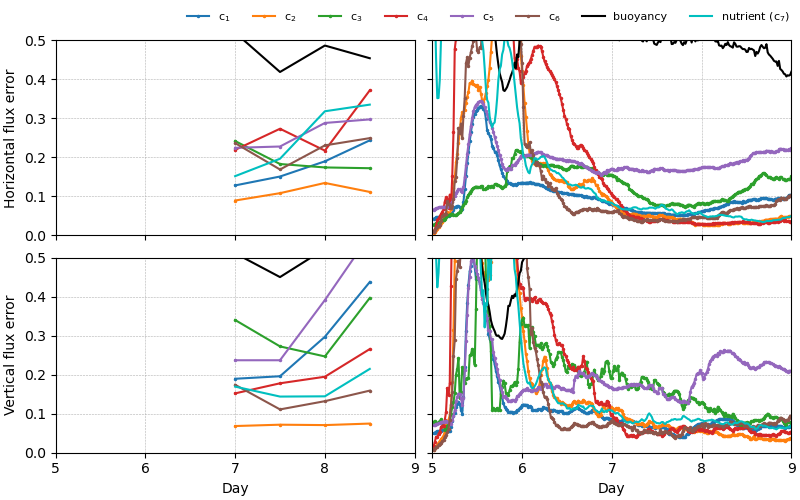

In [32]:
plt.close()
fig,ax = plt.subplots(2,2, figsize=(8,5), constrained_layout=True, sharex=True, sharey=True)

for tr in α_used.data:
    ax[0,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1,α=tr), 'o-', ms=1.5)
for tr in α_reserved.data[:-3]:
    ax[0,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1,α=tr))
ax[0,0].grid(ls='--', lw=0.4)
ax[0,0].plot(ds.day, ds['⟨uᵢˢbᵝˢ⟩ₐ_err'].sel(i=1,β='active'), 'k')
ax[0,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1).isel(α=-1), 'c')

for tr in α_used.data:
    ax[1,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3,α=tr), 'o-', ms=1.5)
for tr in α_reserved.data[:-3]:
    ax[1,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3,α=tr))
ax[1,0].plot(ds.day, ds['⟨uᵢˢbᵝˢ⟩ₐ_err'].sel(i=3,β='active'), 'k')
ax[1,0].plot(ds.day, ds['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3).isel(α=-1), 'c')
ax[1,0].grid(ls='--', lw=0.4)


for tr in α_used.data:
    ax[0,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1,α=tr), 'o-', ms=1.5)
for tr in α_reserved.data[:-3]:
    ax[0,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1,α=tr))
ax[0,1].grid(ls='--', lw=0.4)
ax[0,1].plot(ds1.day, ds1['⟨uᵢˢbᵝˢ⟩ₐ_err'].sel(i=1,β='active'), 'k')
ax[0,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=1).isel(α=-1), 'c')

for tr in α_used.data:
    ax[1,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3,α=tr), 'o-', ms=1.5)
for tr in α_reserved.data[:-3]:
    ax[1,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3,α=tr))
ax[1,1].plot(ds1.day, ds1['⟨uᵢˢbᵝˢ⟩ₐ_err'].sel(i=3,β='active'), 'k')
ax[1,1].plot(ds1.day, ds1['⟨uᵢˢcᵅˢ⟩ₐ_err'].sel(i=3).isel(α=-1), 'c')
ax[1,1].grid(ls='--', lw=0.4)


fig.legend([rf'c$_{{{tr}}}$' for tr in α_used.data] +\
           [rf'c$_{{{tr}}}$' for tr in α_reserved.data[:-3]] +\
           ['buoyancy', r'nutrient (c$_7$)'],
             frameon=False, loc='outside upper right', ncols=8, fontsize=8)
plt.ylim(0,0.5)
plt.xlim(5,9)
ax[1,0].set_xticks(np.linspace(5,9,5))
ax[1,1].set_xticks(np.linspace(5,9,5))
ax[1,0].set_xlabel(r'Day')
ax[1,1].set_xlabel(r'Day')
ax[0,0].set_ylabel('Horizontal flux error')
ax[1,0].set_ylabel('Vertical flux error');

In [7]:
def add_colorbar(pcm, ax, **kwargs):
    cbar = plt.colorbar(pcm, ax=ax, **kwargs)
    cbar.ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    cbar.ax.tick_params(labelsize=8, length=2)
    cbar.ax.yaxis.get_offset_text().set_fontsize(6)
    cbar.ax.yaxis.get_offset_text().set_position((5,1))

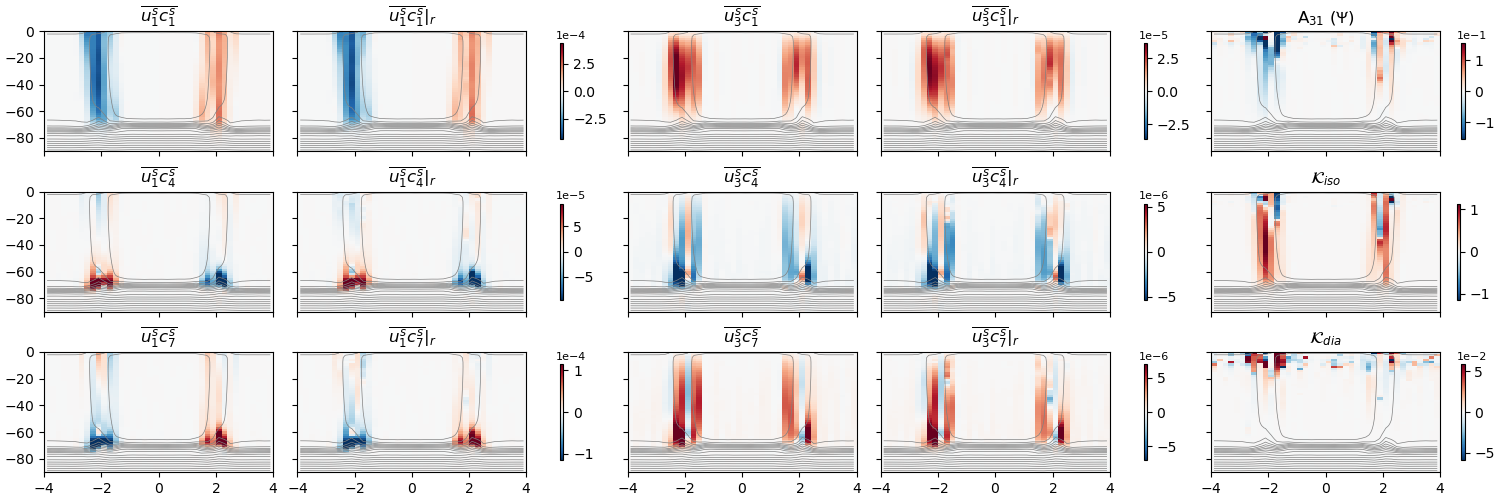

In [39]:
plt.close()
_,ax = plt.subplots(3,5, figsize=(15,5), constrained_layout=True, sharex=True, sharey=True)
itime = 0
# itime = 24*3*3 + 12 -1
trag = 1
trag = 1
trab = 4
trm = 7
zlims = dict(bottom=-90, top=0)
# xlims = dict(left=-4, right=4)
xlims = dict(left=0.9, right=3.1)
yticks = np.linspace(-80, 0, 5)
blines = np.arange(2.2, 3.5, 0.06)*1e-4
aspect = 25
shrink = 0.8

#### Horizontal Fluxes ########################################################################################################################
di = 1
_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trag), ax[0,0])
ax[0,0].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trag), ax[0,1], sym_mag=mag1)
ax[0,1].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}|_r$")
add_colorbar(pcm, ax[0,:2], aspect=aspect, shrink=shrink, pad=pad)
ax[0,0].set_ylim(**zlims)
ax[0,0].set_xlim(**xlims)
ax[0,0].set_yticks(yticks)

_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trab), ax[1,0])
ax[1,0].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trab), ax[1,1], sym_mag=mag1)
ax[1,1].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}|_r$")
add_colorbar(pcm, ax[1,:2], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trm), ax[2,0])
ax[2,0].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trm), ax[2,1], sym_mag=mag1)
ax[2,1].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}|_r$")
add_colorbar(pcm, ax[2,:2], aspect=aspect, shrink=shrink, pad=pad)


#### Vertical Fluxes ########################################################################################################################
di = 3
_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trag), ax[0,2])
ax[0,2].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trag), ax[0,3], sym_mag=mag1)
ax[0,3].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}|_r$")
add_colorbar(pcm, ax[0,2:4], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trab), ax[1,2])
ax[1,2].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trab), ax[1,3], sym_mag=mag1)
ax[1,3].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}|_r$")
add_colorbar(pcm, ax[1,2:4], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trm), ax[2,2])
ax[2,2].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}$")
pcm,_ = pcolor_center(ds1['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trm), ax[2,3], sym_mag=mag1)
ax[2,3].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}|_r$")
add_colorbar(pcm, ax[2,2:4], aspect=aspect, shrink=shrink, pad=pad)


#### Transport Tensors ########################################################################################################################
pcm,_ = pcolor_center(ds1['Aᵢⱼ'].isel(time=itime).sel(i=3, j=1), ax[0,4], cmap='RdYlBu_r')
ax[0,4].set_title(r'A$_{31}$ ($\mathcal{\Psi}$)')
add_colorbar(pcm, ax[0,4], aspect=aspect, shrink=shrink, pad=pad)

pcm,_ = pcolor_center(ds1['Kappa'].isel(time=itime).sel(k=1), ax[1,4], cmap='RdYlBu_r')
ax[1,4].set_title(r'$\mathcal{K}_{iso}$')
add_colorbar(pcm, ax[1,4], aspect=aspect, shrink=shrink, pad=pad)

pcm,_ = pcolor_center(ds1['Kappa'].isel(time=itime).sel(k=2), ax[2,4], cmap='RdYlBu_r')
ax[2,4].set_title(r'$\mathcal{K}_{dia}$')
add_colorbar(pcm, ax[2,4], aspect=aspect, shrink=shrink, pad=pad);

for i in range(3):
    for j in range(5):
        ax[i,j].contour(ds1.xC, ds1.zC, ds1['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.5)

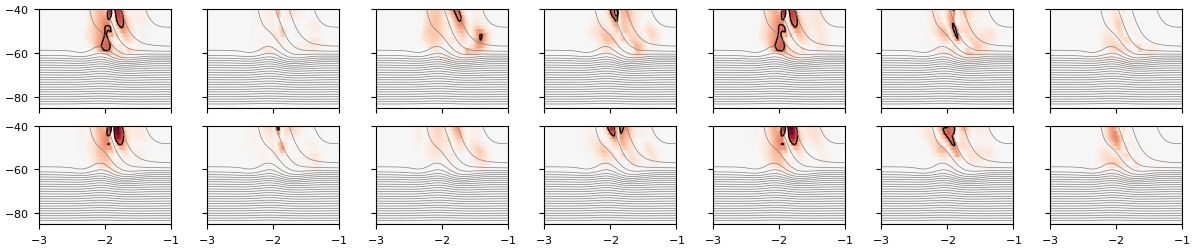

In [8]:
plt.close()
_,ax = plt.subplots(2,7, figsize=(12,2.5), constrained_layout=True, sharex=True, sharey=True)
itime = 0
# itime = 24*3*3 + 12 -1
ztop = -40
zlims = dict(bottom=-85, top=ztop)
# xlims = dict(left=-4, right=4)
# xlims = dict(left=1, right=3)
xlims = dict(left=-3, right=-1)
yticks = np.linspace(-80, 0, 5)
xticks = np.linspace(-4, 4, 9)
blines = np.arange(2.4, 3.5, 0.04)*1e-4
cupr   = 1.6
aspect = 20
shrink = 0.8
pad    = 0
dstr   = ['u', 'v', 'w']
zmask  = ds.zC <= ztop

# eddying = np.abs(ds['⟨uᵢˢcᵅˢ⟩ₐ']) > 0.1*np.abs(ds['⟨uᵢˢcᵅˢ⟩ₐ']).max(['xC', 'zC'])
delta = np.abs(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'] - ds['⟨uᵢˢcᵅˢ⟩ₐ']) / np.abs(ds['⟨uᵢˢcᵅˢ⟩ₐ']).where(zmask).max(['xC', 'zC'])

for ia,di in enumerate([1,3]):
    for ja,tr in enumerate(np.arange(1,8)):
        pcolor_center(delta.isel(time=itime).sel(i=di, α=tr), ax[ia,ja], sym_mag=1)
        ax[ia,ja].contour(ds.xC, ds.zC, delta.isel(time=itime).sel(i=di, α=tr), levels=[0.5], colors='k', linewidths=1)
        ax[ia,ja].contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.5)
        ax[ia,ja].tick_params(labelsize=8)
ax[0,0].set_yticks(yticks)
ax[0,0].set_ylim(**zlims)
ax[0,0].set_xlim(**xlims);

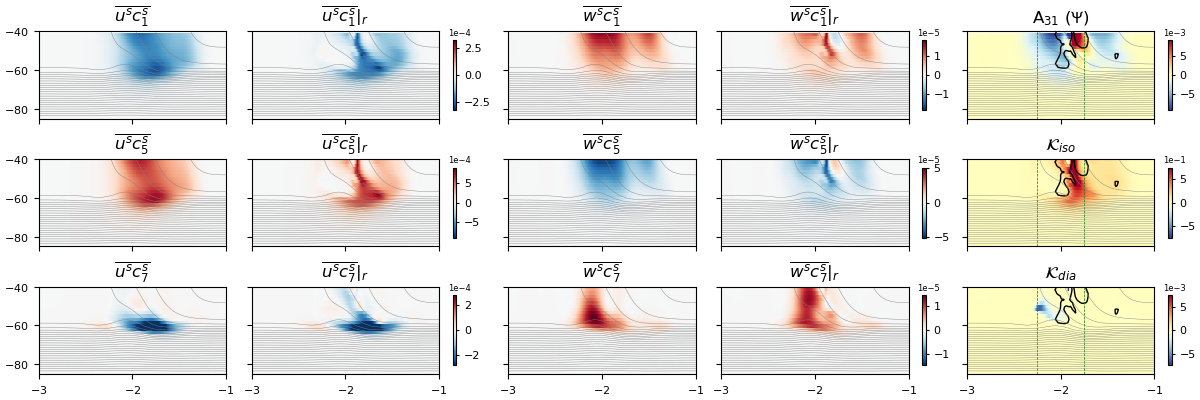

In [9]:
plt.close()
_,ax = plt.subplots(3,5, figsize=(12,4), constrained_layout=True, sharex=True, sharey=True)
itime = 0
# itime = 24*3*3 + 12 -1
trag = 1
trab = 5
trm = 7
ztop = -40
zlims = dict(bottom=-85, top=ztop)
# xlims = dict(left=-4, right=4)
# xlims = dict(left=1, right=3)
xlims = dict(left=-3, right=-1)
yticks = np.linspace(-80, 0, 5)
xticks = np.linspace(-4, 4, 9)
blines = np.arange(2.4, 3.5, 0.04)*1e-4
cupr   = 1.5
aspect = 20
shrink = 0.8
pad    = 0
dstr   = ['u', 'v', 'w']
zmask  = ds.zC <= ztop

#### Horizontal Fluxes ########################################################################################################################
di = 1
uvw = dstr[di-1]
_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trag).where(zmask), ax[0,0], cupr=cupr)
ax[0,0].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trag).where(zmask), ax[0,1], cupr=cupr, sym_mag=mag1)
ax[0,1].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}|_r$")
add_colorbar(pcm, ax[0,:2], aspect=aspect, shrink=shrink, pad=pad)
ax[0,0].set_yticks(yticks)
ax[0,0].set_xticks(xticks)
ax[0,0].set_ylim(**zlims)
ax[0,0].set_xlim(**xlims)

_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trab).where(zmask), ax[1,0], cupr=cupr)
ax[1,0].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trab).where(zmask), ax[1,1], cupr=cupr, sym_mag=mag1)
ax[1,1].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}|_r$")
add_colorbar(pcm, ax[1,:2], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trm).where(zmask), ax[2,0], cupr=cupr)
ax[2,0].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trm).where(zmask), ax[2,1], cupr=cupr, sym_mag=mag1)
ax[2,1].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}|_r$")
add_colorbar(pcm, ax[2,:2], aspect=aspect, shrink=shrink, pad=pad)


#### Vertical Fluxes ########################################################################################################################
di = 3
uvw = dstr[di-1]
_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trag).where(zmask), ax[0,2], cupr=cupr)
ax[0,2].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trag).where(zmask), ax[0,3], cupr=cupr, sym_mag=mag1)
ax[0,3].set_title(rf"$\overline{{{uvw}^s c_{{{trag}}}^s}}|_r$")
add_colorbar(pcm, ax[0,2:4], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trab).where(zmask), ax[1,2], cupr=cupr)
ax[1,2].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trab).where(zmask), ax[1,3], cupr=cupr, sym_mag=mag1)
ax[1,3].set_title(rf"$\overline{{{uvw}^s c_{{{trab}}}^s}}|_r$")
add_colorbar(pcm, ax[1,2:4], aspect=aspect, shrink=shrink, pad=pad)

_,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trm).where(zmask), ax[2,2], cupr=cupr)
ax[2,2].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}$")
pcm,_ = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐᵣ'].isel(time=itime).sel(i=di, α=trm).where(zmask), ax[2,3], cupr=cupr, sym_mag=mag1)
ax[2,3].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}|_r$")
add_colorbar(pcm, ax[2,2:4], aspect=aspect, shrink=shrink, pad=pad)


#### Transport Tensors ########################################################################################################################
pcm,_ = pcolor_center(ds['Aᵢⱼ'].isel(time=itime).sel(i=3, j=1).where(zmask), ax[0,4], cupr=cupr, cmap='RdYlBu_r')
ax[0,4].set_title(r'A$_{31}$ ($\mathcal{\Psi}$)')
add_colorbar(pcm, ax[0,4], aspect=aspect, shrink=shrink, pad=pad)

pcm,mag1 = pcolor_center(ds['Kappa'].isel(time=itime).sel(k=1).where(zmask), ax[1,4], cupr=cupr, cmap='RdYlBu_r')
ax[1,4].set_title(r'$\mathcal{K}_{iso}$')
add_colorbar(pcm, ax[1,4], aspect=aspect, shrink=shrink, pad=pad)

pcm,_ = pcolor_center(ds['Kappa'].isel(time=itime).sel(k=2).where(zmask), ax[2,4], cupr=cupr, cmap='RdYlBu_r', sym_mag=mag1/100)
ax[2,4].set_title(r'$\mathcal{K}_{dia}$')
add_colorbar(pcm, ax[2,4], aspect=aspect, shrink=shrink, pad=pad)

for ia in range(3):
    for ja in range(5):
        if ja==4:
            ax[ia,ja].contour(ds.xC, ds.zC, delta.isel(time=itime).max(['i', 'α']), levels=[0.5], colors='k', linewidths=1)
            ax[ia,ja].axvline(-2.25, ls='--', lw=0.5, c='g')
            ax[ia,ja].axvline(-1.75, ls='--', lw=0.5, c='g')
        ax[ia,ja].contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.3)
        ax[ia,ja].tick_params(labelsize=8)

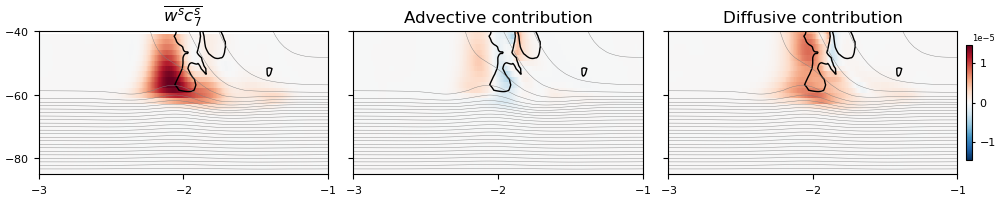

In [10]:
plt.close()
_,ax = plt.subplots(1,3, figsize=(10,2), constrained_layout=True, sharex=True, sharey=True)

di = 3
pcm,mag1 = pcolor_center(ds['⟨uᵢˢcᵅˢ⟩ₐ'].isel(time=itime).sel(i=di, α=trm).where(zmask), ax[0], cupr=cupr)
ax[0].set_title(rf"$\overline{{{uvw}^s c_{{{trm}}}^s}}$")

pcolor_center(-ds['Aᵢⱼ'].isel(time=itime).sel(i=3, j=1) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=1, α=trm), ax[1], cupr=cupr, sym_mag=mag1)
ax[1].set_title(r"Advective contribution")

ax[2].pcolormesh(ds.xC, ds.zC, -ds['Sᵢⱼ'].isel(time=itime).sel(i=3, j=1) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=1, α=trm)\
                               -ds['Sᵢⱼ'].isel(time=itime).sel(i=3, j=3) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=3, α=trm),
                  vmin=-mag1*cupr, vmax=mag1*cupr, cmap='RdBu_r')
ax[2].set_title(r"Diffusive contribution")
ax[0].set_yticks(yticks)
ax[0].set_xticks(xticks)
ax[0].set_ylim(**zlims)
ax[0].set_xlim(**xlims)

add_colorbar(pcm, ax[:], aspect=aspect, shrink=shrink, pad=pad);
for ja in range(3):
    ax[ja].contour(ds.xC, ds.zC, delta.isel(time=itime).max(['i', 'α']), levels=[0.5], colors='k', linewidths=1)
    ax[ja].contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.3)
    ax[ja].tick_params(labelsize=8)

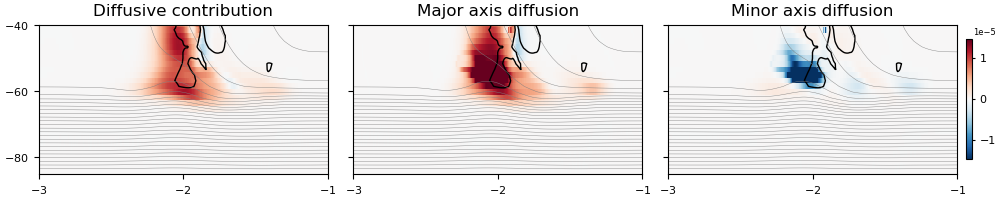

In [11]:
plt.close()
_,ax = plt.subplots(1,3, figsize=(10,2), constrained_layout=True, sharex=True, sharey=True)

diffusive_flux_major = -ds['Kappa_vec'].sel(k=1).isel(time=itime, kv=1) * ds['Kappa'].isel(time=itime).sel(k=1) *\
                       (ds['Kappa_vec'].sel(k=1).isel(time=itime, kv=0) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=1, α=trm) +\
                        ds['Kappa_vec'].sel(k=1).isel(time=itime, kv=1) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=3, α=trm))
diffusive_flux_minor = -ds['Kappa_vec'].sel(k=2).isel(time=itime, kv=1) * ds['Kappa'].isel(time=itime).sel(k=2) *\
                       (ds['Kappa_vec'].sel(k=2).isel(time=itime, kv=0) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=1, α=trm) +\
                        ds['Kappa_vec'].sel(k=2).isel(time=itime, kv=1) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=3, α=trm))

pcm,_ = pcolor_center(-ds['Sᵢⱼ'].isel(time=itime).sel(i=3, j=1) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=1, α=trm)\
                         -ds['Sᵢⱼ'].isel(time=itime).sel(i=3, j=3) * ds['∇ⱼ⟨cᵅ⟩ₐ'].isel(time=itime).sel(j=3, α=trm),
                         ax[0], cupr=cupr, sym_mag=mag1, cmap='RdBu_r')
ax[0].set_title(r"Diffusive contribution")

pcolor_center(diffusive_flux_major, ax[1], cupr=cupr, sym_mag=mag1)
ax[1].set_title(r"Major axis diffusion")

pcolor_center(diffusive_flux_minor, ax[2], cupr=cupr, sym_mag=mag1)
ax[2].set_title(r"Minor axis diffusion")

ax[0].set_yticks(yticks)
ax[0].set_xticks(xticks)
ax[0].set_ylim(**zlims)
ax[0].set_xlim(**xlims)
add_colorbar(pcm, ax[:], aspect=aspect, shrink=shrink, pad=pad);
for ja in range(3):
    ax[ja].contour(ds.xC, ds.zC, delta.isel(time=itime).max(['i', 'α']), levels=[0.5], colors='k', linewidths=1)
    ax[ja].contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.3)
    ax[ja].tick_params(labelsize=8)

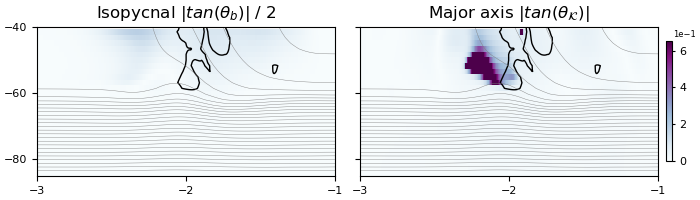

In [12]:
plt.close()
_,ax = plt.subplots(1,2, figsize=(7,2), constrained_layout=True, sharex=True, sharey=True)

itime = 0
Kappa_angle = np.abs(ds['Kappa_vec'].sel(k=1).isel(time=itime, kv=1) / ds['Kappa_vec'].sel(k=1).isel(time=itime, kv=0))
isopycnal_angle = np.abs(-ds['∇ⱼ⟨bᵝ⟩ₐ'].sel(j=1).isel(time=itime, β=0) / ds['∇ⱼ⟨bᵝ⟩ₐ'].sel(j=3).isel(time=itime, β=0))

pcm = pcolor_lim(isopycnal_angle.where(zmask), ax[0], clim=[0, 0.65], cmap='BuPu')
ax[0].set_title(r"Isopycnal $|tan$($\theta_b$)| / 2")

pcolor_lim(Kappa_angle.where(zmask), ax[1], clim=[0, 0.65], cmap='BuPu')
ax[1].set_title(r"Major axis $|tan$($\theta_{\mathcal{K}}$)|")

plt.gca().set_yticks(yticks)
plt.gca().set_xticks(xticks)
plt.gca().set_ylim(**zlims)
plt.gca().set_xlim(**xlims)
add_colorbar(pcm, ax[:], aspect=aspect, shrink=shrink, pad=pad)
for ja in range(2):
    ax[ja].contour(ds.xC, ds.zC, delta.isel(time=itime).max(['i', 'α']), levels=[0.5], colors='k', linewidths=1)
    ax[ja].contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.3)
    ax[ja].tick_params(labelsize=8)

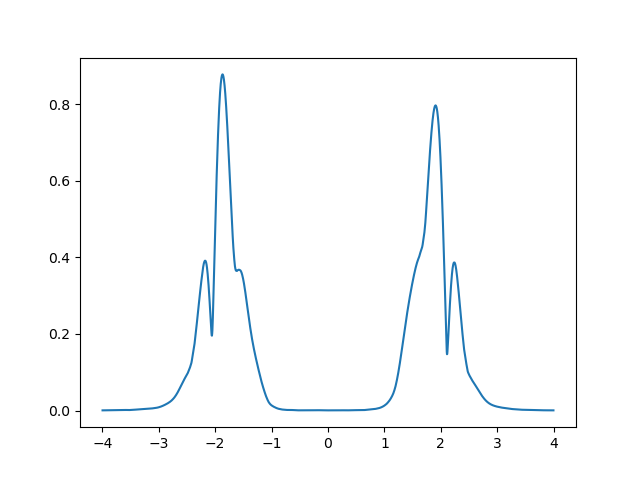

In [130]:
plt.close()
plt.figure()
dbdx_mean = np.abs(ds['∇ⱼ⟨bᵝ⟩ₐ'].isel(β=0, time=time_window).sel(j=1)).where((ds.zC >= -70) & (ds.zC <= ztop)).mean(['time', 'zC']) / ds.attrs['M²']

plt.plot(ds.xC, dbdx_mean);
# pcolor_lim(np.abs(ds['∇ⱼ⟨bᵝ⟩ₐ'].isel(β=0, time=itime).sel(j=1))/ds.attrs['M²'], plt.gca(), clim=[0,1], cmap='viridis')
# plt.contour(ds.xC, ds.zC, np.abs(ds['∇ⱼ⟨bᵝ⟩ₐ'].isel(β=0, time=itime).sel(j=1))/ds.attrs['M²'], levels=[0.5], colors='r', linewidths=1)
# plt.contour(ds.xC, ds.zC, ds['⟨bᵝ⟩ₐ'].isel(time=itime).sel(β='active'), levels=blines, colors='gray', linewidths=0.3)
# plt.gca().set_xlim(**xlims)
# plt.gca().set_ylim(**zlims);

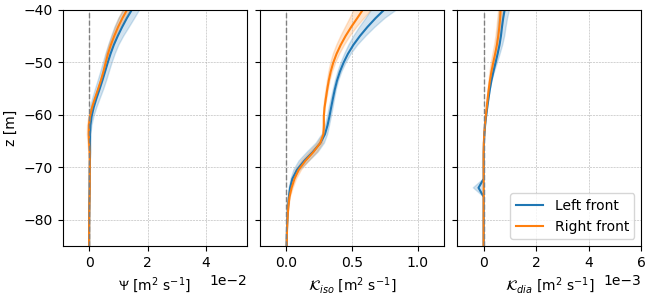

In [7]:
plt.close()
_,ax = plt.subplots(1,3, figsize=(6.5,3), sharey=True, constrained_layout=True)

x1 = 1.7
x2 = 2.3
ztop = -40
zlims = dict(bottom=-85, top=ztop)
yticks = np.linspace(-80, ztop, 5)
time_window = slice(None, 2)
# dbdx_mean = np.abs(ds['∇ⱼ⟨bᵝ⟩ₐ'].isel(β=0, time=time_window).sel(j=1)).where((ds.zC >= -70) & (ds.zC <= ztop)).mean(['time', 'zC']) / ds.attrs['M²']

good_reconstruction = (delta < 0.5).all(['i', 'α'])
# large_dbdx = dbdx_mean >= 0.5
# left_front = ds.xC < 0 & large_dbdx & good_reconstruction
# right_front = ds.xC > 0 & large_dbdx & good_reconstruction
left_front = (ds.xC >= -x2) & (ds.xC <= -x1) & good_reconstruction
right_front = (ds.xC >=  x1) & (ds.xC <=  x2) & good_reconstruction
psi_left  = ds['Aᵢⱼ'].sel(i=3, j=1).isel(time=time_window).where(left_front).mean('xC')
psi_right = ds['Aᵢⱼ'].sel(i=3, j=1).isel(time=time_window).where(right_front).mean('xC')
kappa1_left  = ds['Kappa'].sel(k=1).isel(time=time_window).where(left_front).mean('xC')
kappa1_right = ds['Kappa'].sel(k=1).isel(time=time_window).where(right_front).mean('xC')
kappa2_left  = ds['Kappa'].sel(k=2).isel(time=time_window).where(left_front).mean('xC')
kappa2_right = ds['Kappa'].sel(k=2).isel(time=time_window).where(right_front).mean('xC')

ax[0].plot(-psi_left.mean('time'), ds.zC)
ax[0].fill_betweenx(ds.zC, (-psi_left.mean('time') - psi_left.std('time')), (-psi_left.mean('time') + psi_left.std('time')), alpha=0.2, color='C0')
ax[0].plot(psi_right.mean('time'), ds.zC)
ax[0].fill_betweenx(ds.zC, (psi_right.mean('time') - psi_right.std('time')), (psi_right.mean('time') + psi_right.std('time')), alpha=0.2, color='C1')
ax[1].plot(kappa1_left.mean('time'), ds.zC)
ax[1].fill_betweenx(ds.zC, (kappa1_left.mean('time') - kappa1_left.std('time')), (kappa1_left.mean('time') + kappa1_left.std('time')), alpha=0.2, color='C0')
ax[1].plot(kappa1_right.mean('time'), ds.zC)
ax[1].fill_betweenx(ds.zC, (kappa1_right.mean('time') - kappa1_right.std('time')), (kappa1_right.mean('time') + kappa1_right.std('time')), alpha=0.2, color='C1')
ax[2].plot(kappa2_left.mean('time'), ds.zC)
ax[2].fill_betweenx(ds.zC, (kappa2_left.mean('time') - kappa2_left.std('time')), (kappa2_left.mean('time') + kappa2_left.std('time')), alpha=0.2, color='C0', label='_nolegend_')
ax[2].plot(kappa2_right.mean('time'), ds.zC)
ax[2].fill_betweenx(ds.zC, (kappa2_right.mean('time') - kappa2_right.std('time')), (kappa2_right.mean('time') + kappa2_right.std('time')), alpha=0.2, color='C1', label='_nolegend_')
ax[2].legend(['Left front', 'Right front'], loc='lower right')

for i in range(3):
    ax[i].grid(ls='--', lw=0.4)
    ax[i].axvline(0, ls='--', c='gray', lw=1)
    ax[i].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax[0].set_yticks(yticks)
ax[0].set_ylim(**zlims)
ax[0].set_ylabel('z [m]')

ax[0].set_xlim(-0.9e-2, 5.4e-2)
ax[1].set_xlim(-0.2, 1.2)
ax[2].set_xlim(-1e-3, 6e-3)
ax[0].set_xlabel(r'$\mathcal{\Psi}$ [m$^2$ s$^{-1}$]')
ax[1].set_xlabel(r'$\mathcal{K}_{iso}$ [m$^2$ s$^{-1}$]')
ax[2].set_xlabel(r'$\mathcal{K}_{dia}$ [m$^2$ s$^{-1}$]');

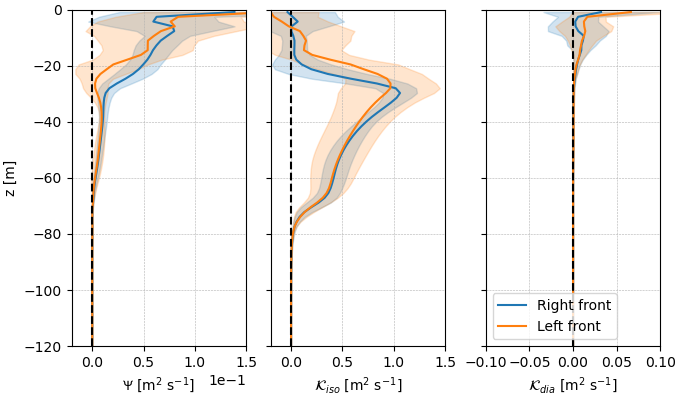

In [18]:
plt.close()

_,ax = plt.subplots(1,3, figsize=(6.8,4), sharey=True, constrained_layout=True)

x1 = 1.75
x2 = 2.25
time_window = slice(24*3*2, None)
psi_left  = ds1['Aᵢⱼ'].sel(i=3, j=1).isel(time=time_window).where((ds1.xC >= -x2) & (ds1.xC <= -x1)).mean('xC')
psi_right = ds1['Aᵢⱼ'].sel(i=3, j=1).isel(time=time_window).where((ds1.xC >=  x1) & (ds1.xC <=  x2)).mean('xC')
kappa1_left  = ds1['Kappa'].sel(k=1).isel(time=time_window).where((ds1.xC >= -x2) & (ds1.xC <= -x1)).mean('xC')
kappa1_right = ds1['Kappa'].sel(k=1).isel(time=time_window).where((ds1.xC >=  x1) & (ds1.xC <=  x2)).mean('xC')
kappa2_left  = ds1['Kappa'].sel(k=2).isel(time=time_window).where((ds1.xC >= -x2) & (ds1.xC <= -x1)).mean('xC')
kappa2_right = ds1['Kappa'].sel(k=2).isel(time=time_window).where((ds1.xC >=  x1) & (ds1.xC <=  x2)).mean('xC')

ax[0].plot(-psi_left.mean('time'), ds1.zC)
ax[0].fill_betweenx(ds1.zC, (-psi_left.mean('time') - psi_left.std('time')), (-psi_left.mean('time') + psi_left.std('time')), alpha=0.2, color='C0')
ax[0].plot(psi_right.mean('time'), ds1.zC)
ax[0].fill_betweenx(ds1.zC, (psi_right.mean('time') - psi_right.std('time')), (psi_right.mean('time') + psi_right.std('time')), alpha=0.2, color='C1')
ax[1].plot(kappa1_left.mean('time'), ds1.zC)
ax[1].fill_betweenx(ds1.zC, (kappa1_left.mean('time') - kappa1_left.std('time')), (kappa1_left.mean('time') + kappa1_left.std('time')), alpha=0.2, color='C0')
ax[1].plot(kappa1_right.mean('time'), ds1.zC)
ax[1].fill_betweenx(ds1.zC, (kappa1_right.mean('time') - kappa1_right.std('time')), (kappa1_right.mean('time') + kappa1_right.std('time')), alpha=0.2, color='C1')
ax[2].plot(kappa2_left.mean('time'), ds1.zC)
ax[2].fill_betweenx(ds1.zC, (kappa2_left.mean('time') - kappa2_left.std('time')), (kappa2_left.mean('time') + kappa2_left.std('time')), alpha=0.2, color='C0', label='_nolegend_')
ax[2].plot(kappa2_right.mean('time'), ds1.zC)
ax[2].fill_betweenx(ds1.zC, (kappa2_right.mean('time') - kappa2_right.std('time')), (kappa2_right.mean('time') + kappa2_right.std('time')), alpha=0.2, color='C1', label='_nolegend_')
plt.legend(['Right front', 'Left front'])
ax[0].axvline(0, ls='--', c='k')
ax[1].axvline(0, ls='--', c='k')
ax[2].axvline(0, ls='--', c='k')
ax[0].grid(ls='--', lw=0.4)
ax[1].grid(ls='--', lw=0.4)
ax[2].grid(ls='--', lw=0.4)
ax[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax[0].set_ylim(-120, 0)
# ax[0].set_xlim(-2e-3, 1e-2)
ax[0].set_xlim(-2e-2, 1.5e-1)
ax[1].set_xlim(-0.2, 1.5)
# ax[2].set_xlim(-5e-5, 1e-4)
ax[2].set_xlim(-10e-2, 10e-2)
ax[0].set_ylabel('z [m]')
ax[0].set_xlabel(r'$\mathcal{\Psi}$ [m$^2$ s$^{-1}$]')
ax[1].set_xlabel(r'$\mathcal{K}_{iso}$ [m$^2$ s$^{-1}$]')
ax[2].set_xlabel(r'$\mathcal{K}_{dia}$ [m$^2$ s$^{-1}$]');

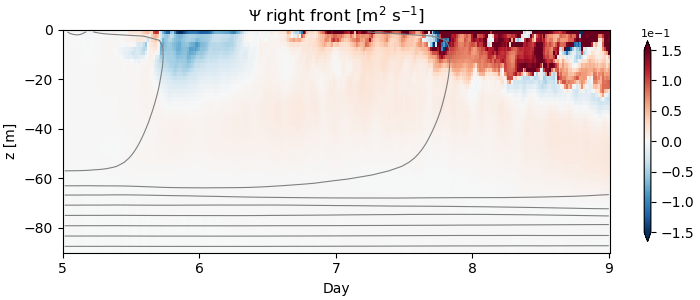

In [52]:
plt.close()
plt.figure(figsize=(7,3), constrained_layout=True)

# pcm = plt.pcolormesh(ds1.day, ds1.zC, ds1['Kappa'].sel(k=1).where((ds1.xC >= x1) & (ds1.xC <= x2)).mean('xC').T, cmap='RdBu_r', vmin=-1.5, vmax=1.5)
pcm = plt.pcolormesh(ds1.day, ds1.zC, ds1['Aᵢⱼ'].sel(i=3, j=1).where((ds1.xC >= x1) & (ds1.xC <= x2)).mean('xC').T, cmap='RdBu_r', vmin=-1.5e-1, vmax=1.5e-1)
plt.contour(ds1.day, ds1.zC, ds1['⟨bᵝ⟩ₐ'].isel(β=0).where((ds1.xC >= x1) & (ds1.xC <= x2)).mean('xC').T, levels=30, colors='gray', linewidths=0.8)
cbar = plt.colorbar(pcm, ax=plt.gca(), aspect=aspect, shrink=0.9, extend='both')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set_fontsize(8)
cbar.ax.yaxis.get_offset_text().set_position((4,0))
plt.ylim(-90, 0)
plt.xticks(np.linspace(5,9,5))
plt.ylabel('z [m]')
plt.xlabel('Day')
plt.title(r'$\mathcal{\Psi}$ right front [m$^2$ s$^{-1}$]');
# plt.title(r'$\mathcal{K}_{iso}$ right front [m$^2$ s$^{-1}$]');